**Motivation**<br>
Sons of tall fathers tend to be tall, but on average not as tall as their fathers; sons of short fathers tend to be short, but on average not as short as their fathers. Why is this? In this notebook we implement an explanation by Fred Ramsey and Daniel Schafer in Chapter 7 of their book <i>The Statistical Sleuth</i>.

In [1]:
library(repr)
# set plot size
options(repr.plot.width=12, repr.plot.height=9)

Warning message:
“package ‘repr’ was built under R version 3.4.4”

In [2]:
# set up data
sigma=10
sigma_1=5
N=2000
x=rnorm(N,100,sigma) # x captures the hereditary component to height that's common to father and son
y1=rnorm(N,0,sigma_1) # y1 captures luck idiosyncratic to fathers
y2=rnorm(N,0,sigma_1) # y2 captures luch idiosyncratic to sons
s1=x+y1 # fathers' height
s2=x+y2 # sons' height

In [3]:
# put everything in a dataframe
df=data.frame(cbind(x,y1,y2,s1,s2))

In [4]:
# fix a height considered to be tall
tall=mean(s1)+sd(s1)

# mean height of sons whose fathers' heights are between tall and tall + window, compare it against tall
window=1
mean(s2[which(s1>=tall & s1<=tall+window)]); tall

[1] 107.9649

[1] 110.9669

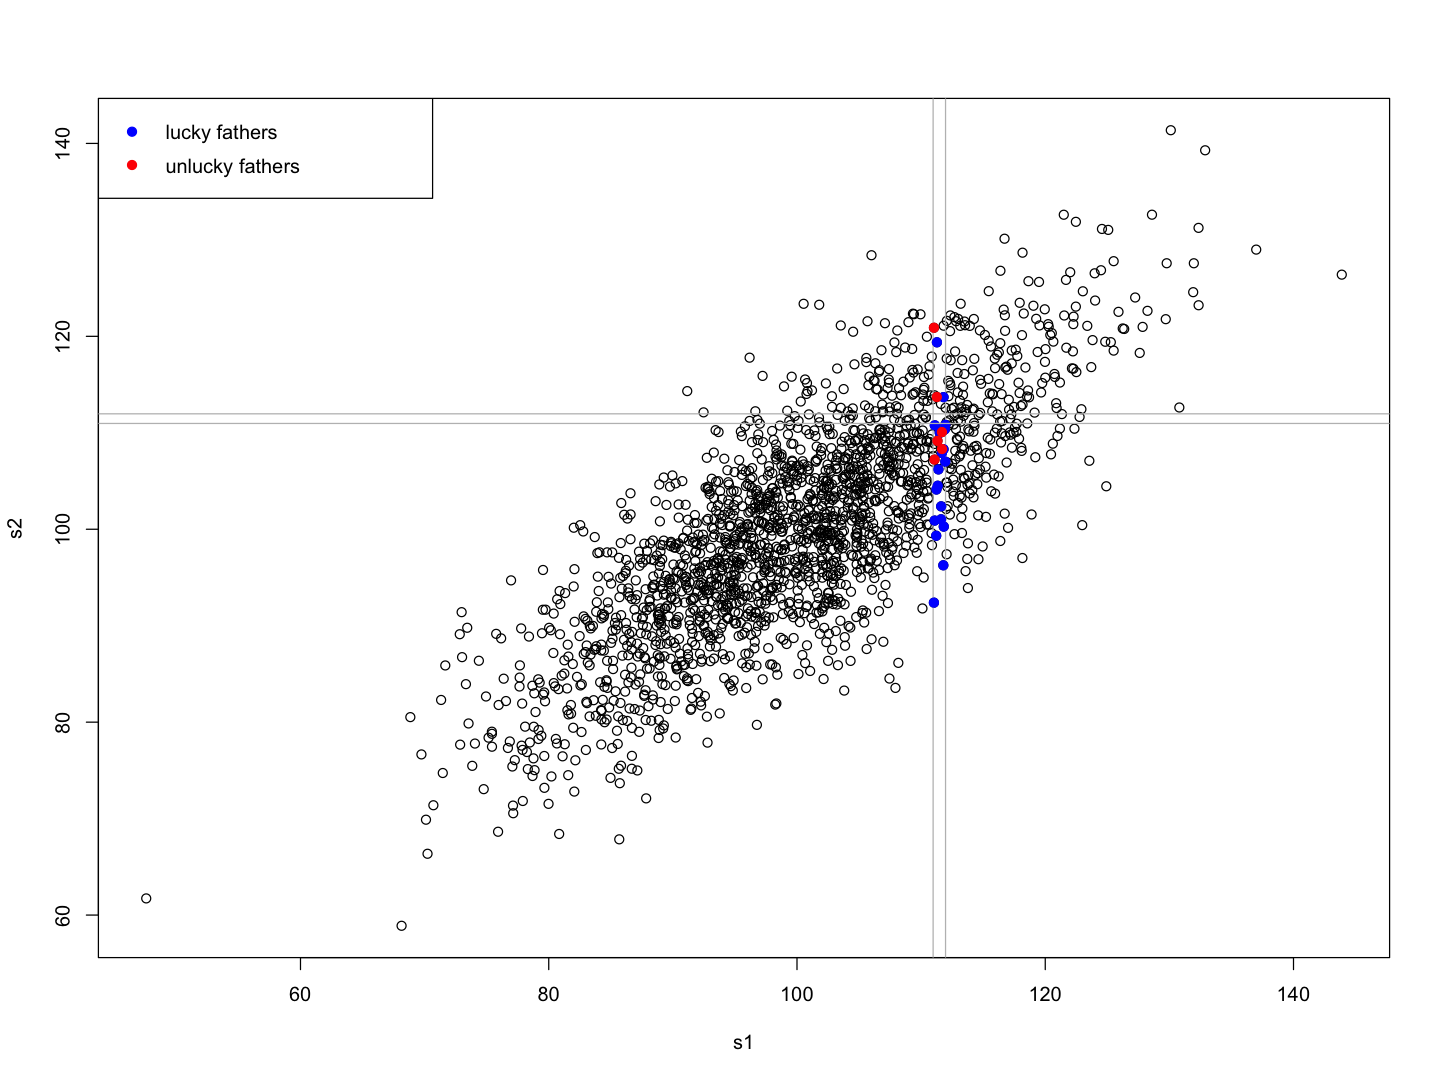

In [5]:
# why is it shorter than tall?
plot(s1,s2)
abline(v=tall,col="grey")
abline(v=tall+window,col="grey")

df1=subset(df,s1>=tall & s1<=tall+window) #subset of fathers whose heights are between tall and tall + window
rownames(df1)=1:nrow(df1)

# height has two components: gene+luck
# divide df1 into three subsets: normal fathers, lucky fathers, unlucky fathers
df1.1=subset(df1,abs(y1)<window)  # normal fathers
df1.2=subset(df1,y1>window)  # lucky fathers
df1.3=subset(df1,y1<(-window))  # unlucky fathers

# highlight lucky and unlucky fathers with their sons
points(df1.2$s1,df1.2$s2,col="blue",pch=19)
points(df1.3$s1,df1.3$s2,col="red",pch=19)
abline(h=tall,col="grey")
abline(h=tall+window,col="grey")
legend("topleft",legend=c("lucky fathers","unlucky fathers"),col=c("blue","red"),pch=c(19,19))

**why sons of tall fathers tend to be not as tall?**<br>
In the above plot, sons of lucky fathers tend to lose the luck (luck is assumed to be idiosyncratic to fathers) and turn out shorter than their fathers (blue dots); similarly, sons of unlucky fathers tend to lose the bad luck and turn out taller than their fathers (red dots). Since there are more blue dots than red dots, on average the sons are not as tall as their fathers. But why are there more blue dots than red dots? Remember that lucky fathers have lower x and big positive y1, unlucky fathers have higher x and big negative y1, lucky fathers outnumbers unlucky fathers because x follows normal distribution, and lower heights are more common than higher heights on the right side of the center of  distribution. A similar argument shows that sons of short fathers tend to be not as short.

**questions:**
1. if sons of tall fathers are not as tall on average, and sons of short fathers are not as short on average, does this imply that over generations men's heights are less and less spread out?

2. are fathers of tall sons as tall on average? are fathers of short sons as short on average?